# Instalação das Dependecias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Ferramentas

Para o estudo utilizamos a linguagem Python em conjunto as biblioteca Scikit-Learn, onde contém implementações de algoritmos de aprendizado de maquina, como SVM que será utilizada para classificação. Todos as ferramentas utilizadas no estudo são open source, sendo livre uso acadêmico e comercial.



# Conjunto de Dados

A classificação de espécies de flores é um problema clássico e seu conjunto de dados é disponibilizado no repositório público da UCI (Centro de Machine Learning). Onde há um total de 150 observações, contendo três espécies de plantas (Setosa, Versicolor e Virginica). 

In [3]:
SEED = 100

## uri do arquivo csv que contem o dataset utilizado
uri = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

## através da biblioteca pandas, estamos baixando o arquivo csv, e carregando ele para que possa ser utilizado
dados = pd.read_csv(uri)

## iremos renomear os nossos cabecalho para que fique mais facil a manipulacao e o entendimento nosso dataset
mapa = {
    "sepal.length": "sepala.comprimento",
    "sepal.width": "sepala.largura",
    "petal.length":"petala.comprimento",
    "petal.width":"petala.largura",
    "variety":"variedade"
}

## estamos aplicando as alteracoes
plantas_data = dados.rename(columns = mapa)
plantas_data = plantas_data[plantas_data['variedade'] != 'Setosa']



# Pré processamento
O **pré-processamento** é uma etapa importante no processo de aprendizado de máquina, é necessário preparar os dados. Se caso não realizarmos essa etapa nosso modelo pode conter viés e influenciar na sua precisão.


In [4]:
features = plantas_data[["sepala.comprimento", "sepala.largura", "petala.comprimento", "petala.largura"]]
target = plantas_data["variedade"]

## Seleção de Atributos

O algoritmo **Random Forest** para realizar a seleção dos atributos. Ele consiste em gerar um grande número de árvores de decisão individuais que funcionam como um conjunto. Cada árvore individual na floresta aleatória produz uma previsão dos atributos e os atributos com mais score utilizaremos como entrada no SVM.

Link: [Artigo sobre Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)



Text(0.5, 1.0, 'Importância de cada feature')

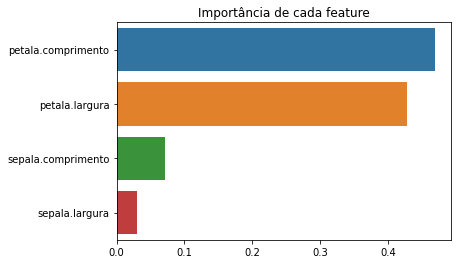

In [5]:
# Treinando modelo
model  = RandomForestClassifier(random_state = np.random.seed(SEED))
model.fit(features, target)

# Mostrando importância de cada feature
importances = pd.Series(data=model.feature_importances_, index=["sepala.comprimento", "sepala.largura", "petala.comprimento", "petala.largura"])
sns.barplot(x=importances, y=importances.index, orient='h', order=["petala.comprimento","petala.largura", "sepala.comprimento", "sepala.largura"]).set_title('Importância de cada feature')

**Separação das features e target do dataset**

Após passarmos os dados pelo Random Forest, conseguimos identificar que os atributos pétala  comprimento, pétala largura são expressivamente mais importantes que os outros atributos. Dessa forma, escolhemos realizar o treinamento apenas com os atributos pétala  comprimento, pétala largura.

In [6]:
## iremos separar o x do seu correspondente em y
x = plantas_data[["petala.comprimento", "petala.largura"]]
y = plantas_data["variedade"]

**Separação dos dados de teste e dados de treino**

Nesse ponto estamos passando para o algoritmo que ira separar oq sera usado de teste, para o treino do nosso dataset.

O **seed** serve para que possamos controlar a aleatoriedade, e o teste se torne mais consiso.

A propriedade **stratify** serve para que ele separe mantendo a proporcao de teste / treino.

In [7]:
## estamos definindo um seed para o nosso algoritmo


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                            test_size = 0.25, random_state = SEED, stratify = y)

**Proporção dos dados**

Como se pode notar os dados de treino e treino estão separados aleatoriamente e divido entre as espécies.

Text(0.5, 1.0, 'Proporção dos dados de teste')

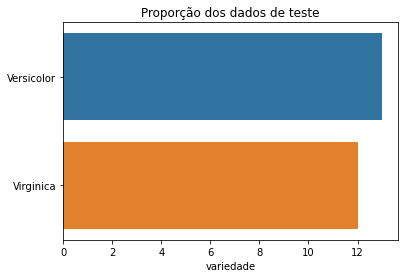

In [8]:
sns.barplot(x=teste_y.value_counts(), y=teste_y.value_counts().index).set_title('Proporção dos dados de teste')

Text(0.5, 1.0, 'Proporção dos dados de treino')

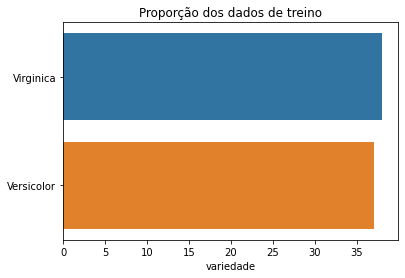

In [9]:
sns.barplot(x=treino_y.value_counts(), y=treino_y.value_counts().index).set_title('Proporção dos dados de treino')

In [10]:
# Precisa realizar a normalização

## Validação de Dados

K-Fold Cross Validation
Para avaliar a acurácia do SVM utilizamos o método **k-fold cross validation**, onde consiste em dividir a base em k pedaços. Para cada pedaço, estimamos o método sem a presença desta parte e verificamos o erro médio no pedaço não utilizado durante o treino. Abaixo, um exemplo de 8-fold cross validation.


## Treinamento
Neste estudo iremos realizar a comparação entre diversos Modelos, sendo:

*   SVM
*   Regressão Logistica
*   Arvore de Decisão



In [12]:
from sklearn.naive_bayes import GaussianNB


models = []
models.append(('SVM', SVC(verbose=False)))
models.append(('Regressão Logistica', LogisticRegression(verbose=False)))
models.append(('Arvore de Decisão', tree.DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))

results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=SEED)
  model.fit(treino_x, treino_y)
  cv_results = model_selection.cross_val_score(model, treino_x, treino_y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)



c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle

<ipython-input-13-0a4dd1c5abc7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


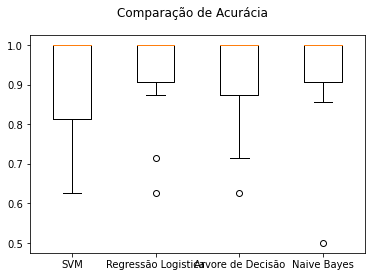

In [13]:
fig = plt.figure()
fig.suptitle('Comparação de Acurácia')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

----------- Modelo: SVM -----------


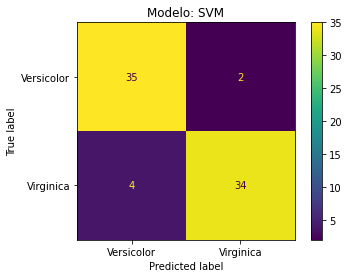

              precision    recall  f1-score   support

  Versicolor       0.90      0.95      0.92        37
   Virginica       0.94      0.89      0.92        38

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

----------- Modelo: Regressão Logistica -----------


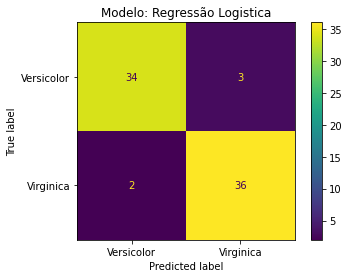

              precision    recall  f1-score   support

  Versicolor       0.94      0.92      0.93        37
   Virginica       0.92      0.95      0.94        38

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

----------- Modelo: Arvore de Decisão -----------


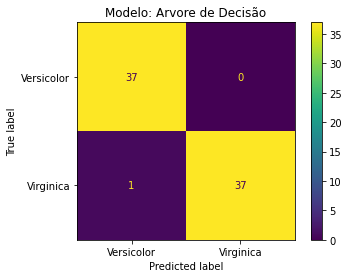

              precision    recall  f1-score   support

  Versicolor       0.97      1.00      0.99        37
   Virginica       1.00      0.97      0.99        38

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

----------- Modelo: Naive Bayes -----------


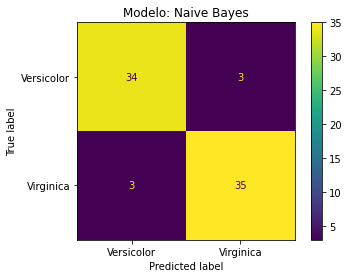

              precision    recall  f1-score   support

  Versicolor       0.92      0.92      0.92        37
   Virginica       0.92      0.92      0.92        38

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [15]:

for model in models:
  print("----------- Modelo: {0} -----------".format(model[0]))
  disp = plot_confusion_matrix(model[1], treino_x, treino_y)
  disp.ax_.set_title("Modelo: {0}".format(model[0]))
  plt.show()

  y_predict = model[1].predict(treino_x)
  print(classification_report(treino_y, y_predict))

